In [1]:
from hypergraphtk.core.hyper_graph import *
from hypergraphtk.visual.visualization import *
from pprint import pprint

In [2]:
# A - set represent a list of decision alternatives
A = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']

# B - set represent a list of criteria for ranking decision alternaitves
B = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']

In [3]:
# matrix represents the criteria values (columns) for the decision alternatives (rows)
matrix = [[0, 1, 7, 0, 1, 6, 3, 2],
          [5, 4, 7, 0, 0, 1, 4, 1],
          [1, 1, 1, 6, 6, 4, 3, 5],
          [1, 3, 7, 7, 3, 5, 5, 4],
          [1, 6, 6, 5, 4, 0, 0, 0],
          [1, 1, 1, 2, 4, 0, 0, 7],
          [0, 2, 2, 5, 0, 0, 0, 6],
          [0, 3, 3, 4, 4, 0, 0, 0],
          [0, 0, 7, 1, 0, 0, 1, 1],
          [2, 7, 2, 2, 0, 0, 1, 6],
          [1, 1, 1, 0, 4, 0, 0, 0],
          [3, 6, 6, 0, 1, 0, 0, 1]]

In [4]:
# weights can be defined to specify the relative importance of a criteria.
# in this case the weights are equally important
weights = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

# cut points are the threshold parameters for conducting a Q-Analysis
# Each cut-point can be used to represent a scale such as low, medium or high
cut_points = [0.2, 0.4, 0.6, 0.8]

In [5]:
norm = normalize(np.array(matrix))
pprint(norm)

array([[0.        , 0.14285714, 1.        , 0.        , 0.16666667,
        1.        , 0.6       , 0.28571429],
       [1.        , 0.57142857, 1.        , 0.        , 0.        ,
        0.16666667, 0.8       , 0.14285714],
       [0.2       , 0.14285714, 0.        , 0.85714286, 1.        ,
        0.66666667, 0.6       , 0.71428571],
       [0.2       , 0.42857143, 1.        , 1.        , 0.5       ,
        0.83333333, 1.        , 0.57142857],
       [0.2       , 0.85714286, 0.83333333, 0.71428571, 0.66666667,
        0.        , 0.        , 0.        ],
       [0.2       , 0.14285714, 0.        , 0.28571429, 0.66666667,
        0.        , 0.        , 1.        ],
       [0.        , 0.28571429, 0.16666667, 0.71428571, 0.        ,
        0.        , 0.        , 0.85714286],
       [0.        , 0.42857143, 0.33333333, 0.57142857, 0.66666667,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.14285714, 0.        ,
        0.        , 0.2     

In [6]:
mqa_i = compute_mcqa_i(np.array(matrix), weights, cut_points)
print(mqa_i)

[1.625      1.49431818 1.36931818 1.12215909 1.48579545 1.71875
 1.75       1.75       1.84375    1.55681818 1.875      1.63352273]


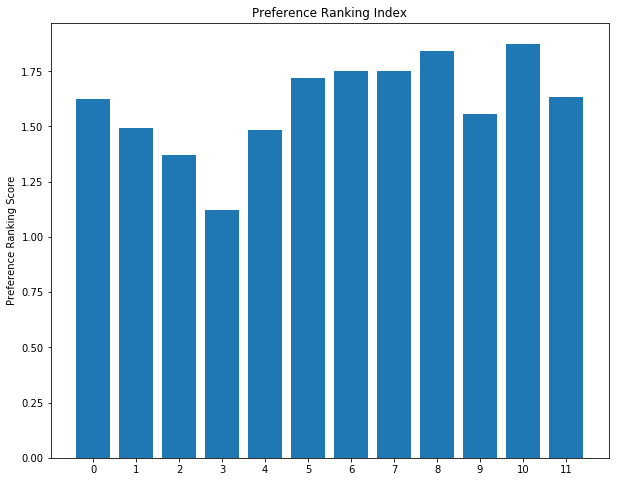

In [7]:
visualize_pri_histogram(mqa_i)

In [8]:
mqa_ii = compute_mcqa_ii(np.array(matrix), weights, cut_points)
print(mqa_ii)

[1.625      1.49431818 1.36931818 1.12215909 1.48579545 1.71875
 1.84090909 1.77272727 1.93465909 1.60227273 1.94318182 1.65625   ]


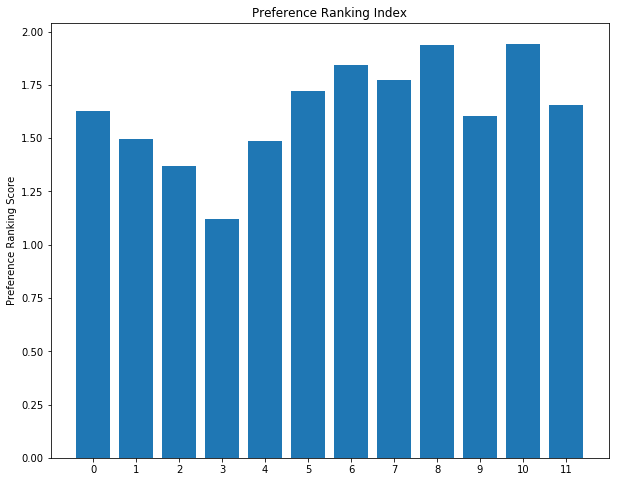

In [9]:
visualize_pri_histogram(mqa_ii)

In [10]:
mqa_iii = compute_mcqa_iii(np.array(matrix), weights, cut_points)
print(mqa_iii)

[0.625      0.5625     0.4375     0.28125    0.53125    0.71875
 0.84090909 0.77272727 0.93465909 0.67045455 0.94318182 0.67897727]


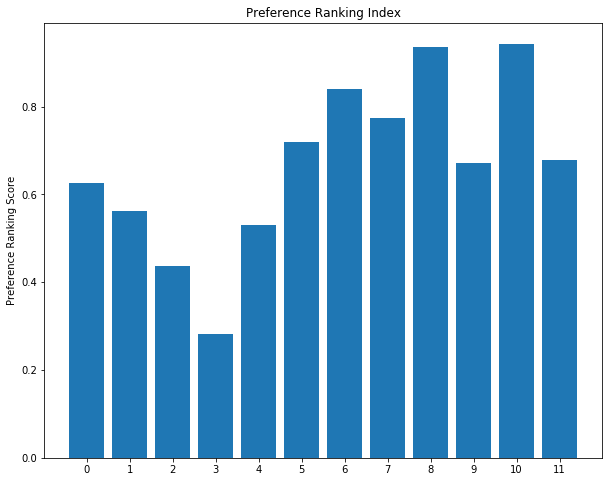

In [11]:
visualize_pri_histogram(mqa_iii)

In [12]:
sg = sparse_graph(norm, 0.6)
sgm = dowker_relation(sg)

In [13]:
print(sgm)

[[ 1.36        0.48        0.02666667  1.43333333 -0.16666667 -1.
  -1.         -1.          0.         -1.         -1.         -0.16666667]
 [ 0.48        1.64       -0.52        0.8        -0.16666667 -1.
  -1.         -1.          0.         -1.         -1.          0.43333333]
 [ 0.02666667 -0.52        2.0493424   1.01269841  0.27891156  0.38095238
   0.2244898  -0.33333333 -1.         -0.3877551  -0.33333333 -1.        ]
 [ 1.43333333  0.8         1.01269841  2.69444444  0.54761905 -1.
  -0.28571429 -1.          0.         -1.         -1.         -0.16666667]
 [-0.16666667 -0.16666667  0.27891156  0.54761905  1.38378685 -0.55555556
  -0.48979592 -0.55555556 -0.16666667 -0.14285714 -0.55555556  0.42913832]
 [-1.         -1.          0.38095238 -1.         -0.55555556  0.44444444
  -0.14285714 -0.55555556 -1.         -0.14285714 -0.55555556 -1.        ]
 [-1.         -1.          0.2244898  -0.28571429 -0.48979592 -0.14285714
   0.24489796 -1.         -1.         -0.26530612 -1.   

In [14]:
for i in range(len(A)):
    path = compute_path(csr_matrix(sgm), i)
    print(path)

[array([0]), array([ 1,  2,  3,  4,  5,  6,  7,  9, 10, 11], dtype=int32), array([8], dtype=int32)]
[array([1]), array([ 0,  2,  3,  4,  5,  6,  7,  9, 10, 11], dtype=int32), array([8], dtype=int32)]
[array([2]), array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32)]
[array([3]), array([ 0,  1,  2,  4,  5,  6,  7,  9, 10, 11], dtype=int32), array([8], dtype=int32)]
[array([4]), array([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11], dtype=int32)]
[array([5]), array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11], dtype=int32)]
[array([6]), array([ 0,  1,  2,  3,  4,  5,  7,  8,  9, 10, 11], dtype=int32)]
[array([7]), array([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11], dtype=int32)]
[array([8]), array([ 2,  4,  5,  6,  7,  9, 10, 11], dtype=int32), array([0, 1, 3], dtype=int32)]
[array([9]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11], dtype=int32)]
[array([10]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11], dtype=int32)]
[array([11]), array([ 0,  1,  2,  3,  4,  5,  6,